In [1]:
import pandas as pd
ames_housing = pd.read_csv("data/house_prices.csv", na_values="?")
target_name = "SalePrice"
data = ames_housing.drop(columns=target_name)
target = ames_housing[target_name]

In [2]:
numerical_features = [
    "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2",
    "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
    "GrLivArea", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces",
    "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch",
    "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal",
]

data_numerical = data[numerical_features]

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(), SimpleImputer(), LinearRegression())
cv_results = cross_validate(
    model, data_numerical, target, cv=10, return_estimator=True
)
coefs = [estimator[-1].coef_ for estimator in cv_results["estimator"]]
coefs = pd.DataFrame(coefs, columns=numerical_features)
coefs.describe().loc[["min", "max"]]

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
min,-789.288382,493.149659,6157.777559,-7.097634e+17,-2.427431e+17,-6.781561e+17,-1.490841e+18,7.704293e+03,1.124683e+04,-1.912343e+03,...,2126.251705,11628.961004,-3278.454592,3285.653481,1255.240989,-3391.824436,31.406083,708.080674,-2739.575338,-1049.229387
max,3118.334085,2600.580022,7841.778092,1.555656e+18,5.384573e+17,1.488825e+18,6.821604e+17,3.037757e+18,3.430206e+18,3.910684e+17,...,3742.495077,22652.887617,4594.573279,5790.840525,3026.579436,-1880.226354,1697.203405,2002.443930,71.752187,609.116535


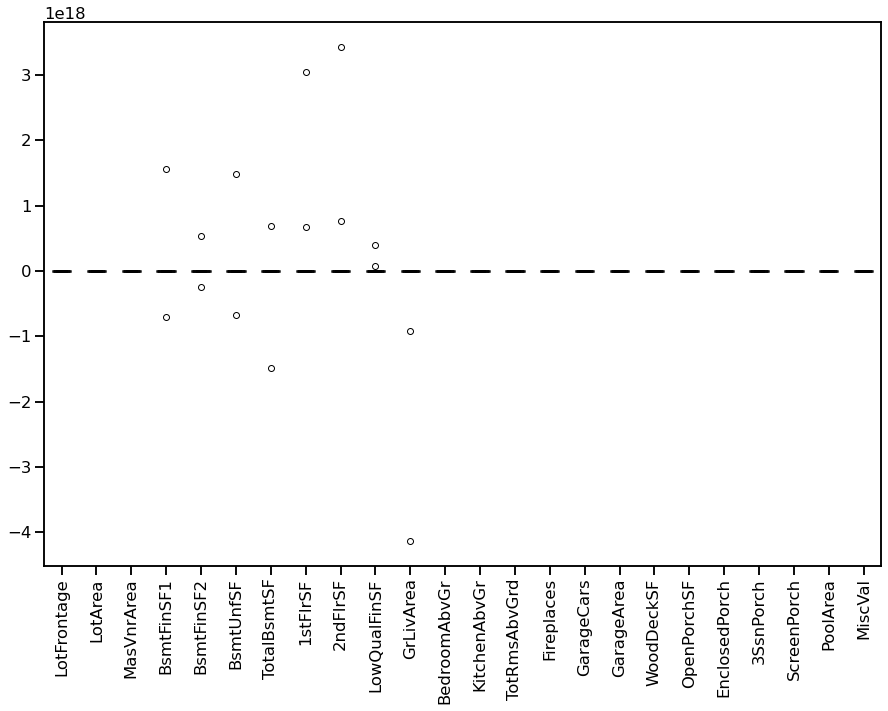

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
# Define the style of the box style
boxplot_property = {
    "vert": True,
    "whis": 100,
    "patch_artist": True,
    "widths": 0.5,
    "rot": 90,
    "boxprops": dict(linewidth=3, color="black", alpha=0.9),
    "medianprops": dict(linewidth=2.5, color="black", alpha=0.9),
    "whiskerprops": dict(linewidth=3, color="black", alpha=0.9),
    "capprops": dict(linewidth=3, color="black", alpha=0.9),
}

_, ax = plt.subplots(figsize=(15, 10))
_ = coefs.plot.box(**boxplot_property, ax=ax)

In [33]:
from sklearn.linear_model import Ridge

In [34]:
model = make_pipeline(StandardScaler(), SimpleImputer(), Ridge())
cv_results = cross_validate(
    model, data_numerical, target, cv=10, return_estimator=True
)

coefs = [estimator[-1].coef_ for estimator in cv_results["estimator"]]
coefs = pd.DataFrame(coefs, columns=numerical_features)
coefs.describe().loc[["min", "max"]]

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
min,-1106.390251,493.241149,6160.174281,7862.675825,-658.138989,2228.279835,10672.328896,7710.158127,11239.294498,-2770.486291,...,2145.289789,11610.608799,-3181.355643,3289.713416,1494.094884,-3392.058947,32.71609,741.077136,-2417.383218,-1050.605437
max,3114.054017,2600.372186,7844.293345,11098.537210,358.864078,4174.361863,15692.315254,11243.761722,13643.834636,-1279.923974,...,3758.108015,22561.856453,4623.099297,5792.154742,3030.373856,-2103.032226,1697.55411,2172.625290,70.601154,608.205089


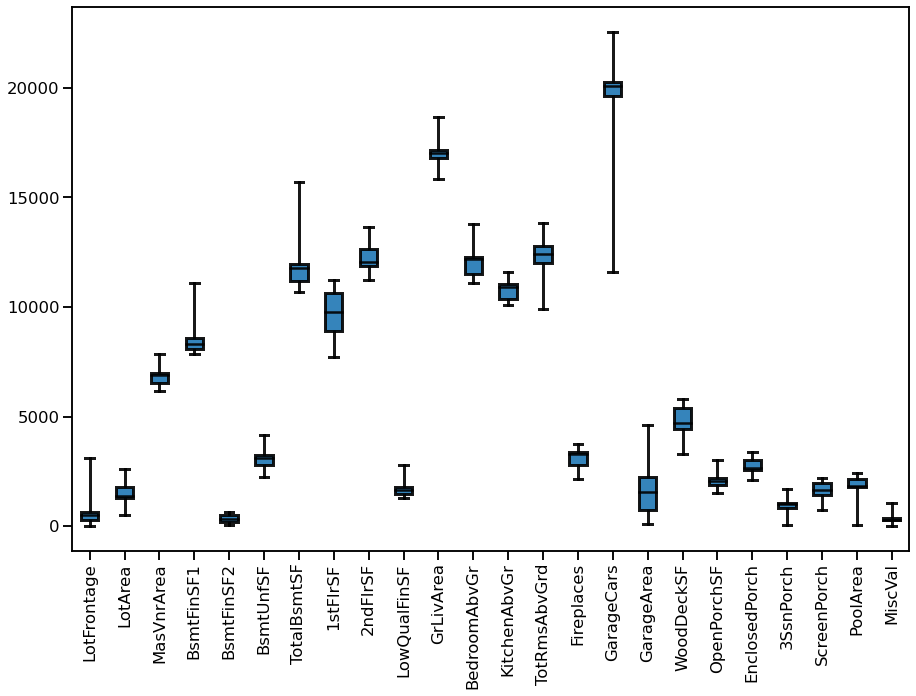

In [35]:
_, ax = plt.subplots(figsize=(15, 10))
_ = coefs.abs().plot.box(**boxplot_property, ax=ax)

In [36]:
data_numerical.drop(columns="GarageArea", inplace=True)
data_numerical.head()

/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,TotRmsAbvGrd,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,8,0,2,0,61,0,0,0,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,6,1,2,298,0,0,0,0,0,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,6,1,2,0,42,0,0,0,0,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,7,1,3,0,35,272,0,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,9,1,3,192,84,0,0,0,0,0


In [38]:
model = make_pipeline(StandardScaler(), SimpleImputer(), Ridge())
cv_results = cross_validate(
    model, data_numerical, target, cv=10, return_estimator=True
)

coefs = [estimator[-1].coef_ for estimator in cv_results["estimator"]]
coefs = pd.DataFrame(coefs, columns=data_numerical.columns)
coefs.describe().loc[["min", "max"]]

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,TotRmsAbvGrd,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
min,-1246.180254,472.202633,6144.828631,7866.531809,-657.940787,2270.422404,10653.999791,7994.882207,11235.642334,-2778.274269,...,10037.962130,1950.739227,15402.011069,3301.200824,1491.733758,-3403.607138,23.331581,742.723021,-2419.134257,-1074.090945
max,3374.129479,2616.065272,7806.524486,11242.631916,364.330676,4124.324453,15797.899648,11124.409669,13642.056831,-1282.701511,...,13817.396445,3803.220302,19964.350894,5785.565906,2978.113944,-2135.694244,1717.941854,2172.356300,56.766883,655.439772


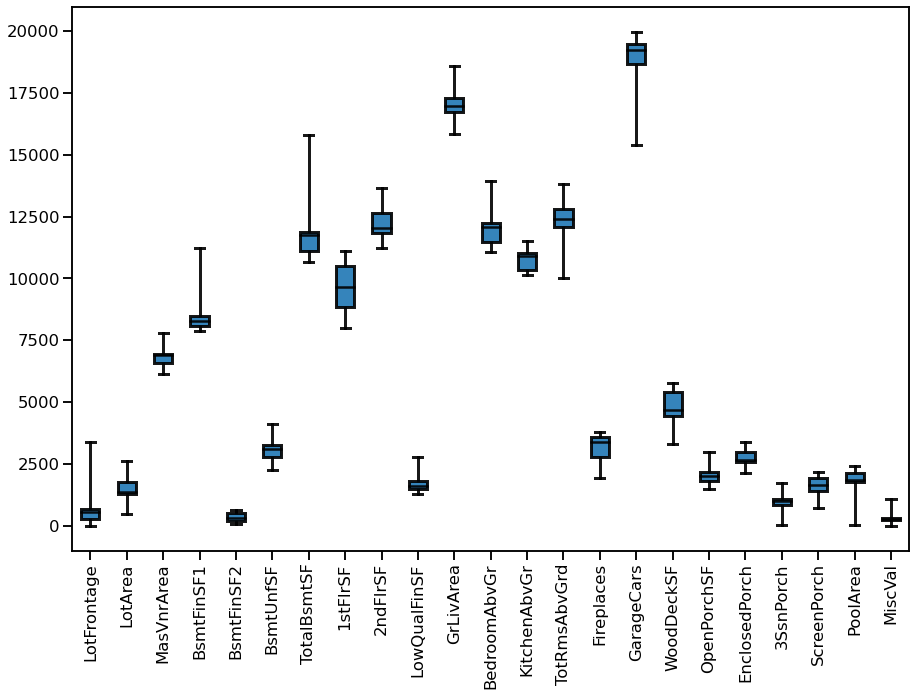

In [39]:
_, ax = plt.subplots(figsize=(15, 10))
_ = coefs.abs().plot.box(**boxplot_property, ax=ax)

In [42]:
from sklearn.linear_model import RidgeCV
import numpy as np

In [45]:
alphas = np.logspace(-1, 3, num=30)
ridge = make_pipeline(StandardScaler(), SimpleImputer(),
                      RidgeCV(alphas=alphas))
cv_results = cross_validate(
    ridge, data_numerical, target, cv=10, return_estimator=True
)

coefs = [estimator[-1].coef_ for estimator in cv_results["estimator"]]
coefs = pd.DataFrame(coefs, columns=data_numerical.columns)
coefs.describe().loc[["min", "max"]]

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,TotRmsAbvGrd,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
min,433.614615,985.592457,6861.123401,6977.487430,-818.340486,2365.398633,10253.752513,8300.684682,8901.508095,-2229.938030,...,8195.446573,2522.263018,15371.593237,3523.134304,2631.632867,-3133.694616,91.922177,669.965009,-1428.570752,-1067.791850
max,3274.916770,2612.049560,8289.482591,10829.688194,-19.986824,3914.097504,15106.362610,9667.359048,12820.325604,-1065.921174,...,11687.738785,5554.818682,17383.869303,5975.817068,3976.131460,-2126.804232,1572.032530,1997.863437,7.808576,606.637166


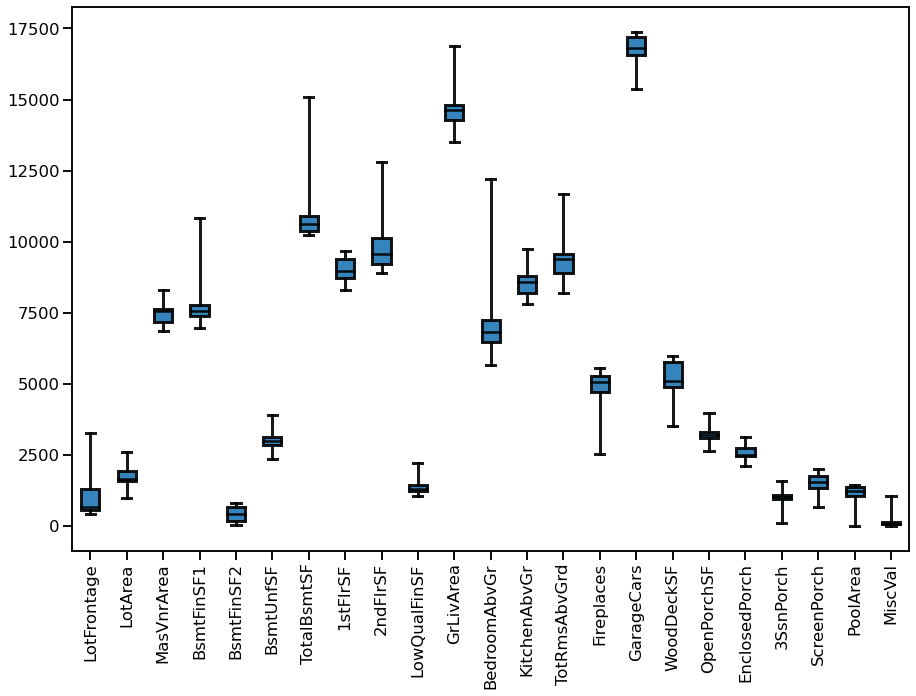

In [46]:
_, ax = plt.subplots(figsize=(15, 10))
_ = coefs.abs().plot.box(**boxplot_property, ax=ax)

In [47]:
for model in cv_results["estimator"]:
    print(model[-1].alpha_)

280.72162039411756
385.6620421163472
280.72162039411756
280.72162039411756
385.6620421163472
385.6620421163472
280.72162039411756
280.72162039411756
57.361525104486816
385.6620421163472


In [62]:
adult_census = pd.read_csv("data/adult-census.csv")
target = adult_census["class"]
data = adult_census.select_dtypes(["integer", "floating"])
data = data.drop(columns=["education-num"])

In [63]:
len(data.columns)

4

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             48842 non-null  int64
 1   capital-gain    48842 non-null  int64
 2   capital-loss    48842 non-null  int64
 3   hours-per-week  48842 non-null  int64
dtypes: int64(4)
memory usage: 1.5 MB


In [65]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

In [66]:
logistic_regression = make_pipeline(StandardScaler(), LogisticRegression())
cv_results = cross_validate(logistic_regression, data, target,
                            cv=10, return_estimator=True)

In [72]:
cv_results["test_score"].mean()

0.7998445658834604

In [69]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(data, target)
dummy_clf.score(data, target)

0.7607182343065395

<AxesSubplot:>

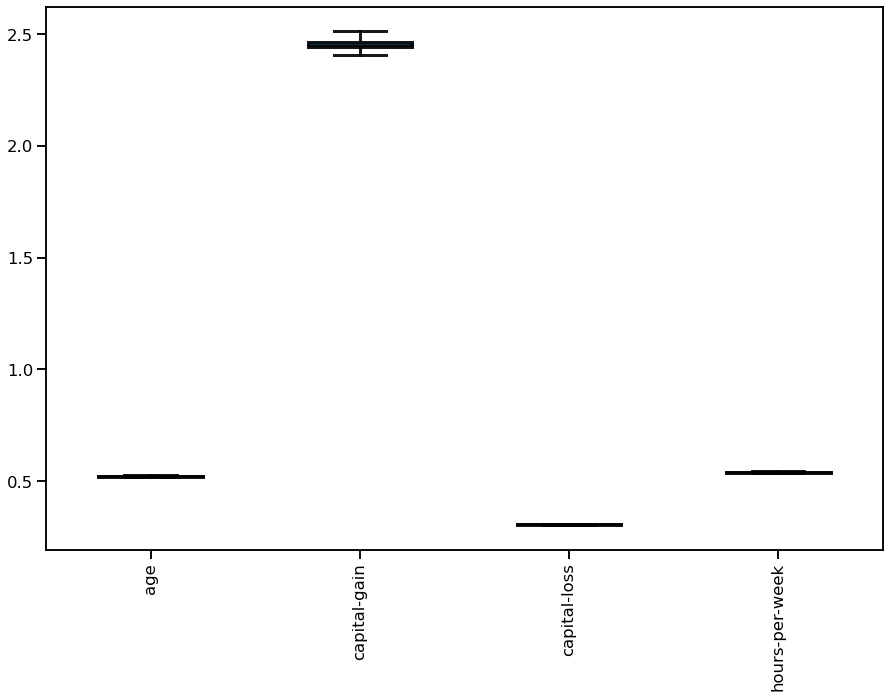

In [79]:
coefs = [estimator[-1].coef_[0] for estimator in cv_results["estimator"]]
coefs = pd.DataFrame(coefs, columns=data.columns)
_, ax = plt.subplots(figsize=(15, 10))
coefs.abs().plot.box(**boxplot_property, ax=ax)

In [80]:
adult_census = pd.read_csv("data/adult-census.csv")
target = adult_census["class"]
data = adult_census.drop(columns=["class", "education-num"])

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   education       48842 non-null  object
 3   marital-status  48842 non-null  object
 4   occupation      48842 non-null  object
 5   relationship    48842 non-null  object
 6   race            48842 non-null  object
 7   sex             48842 non-null  object
 8   capital-gain    48842 non-null  int64 
 9   capital-loss    48842 non-null  int64 
 10  hours-per-week  48842 non-null  int64 
 11  native-country  48842 non-null  object
dtypes: int64(4), object(8)
memory usage: 4.5+ MB


In [82]:
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [83]:
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(data)
categorical_columns = categorical_columns_selector(data)

In [84]:
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

In [85]:
preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standard-scaler', numerical_preprocessor, numerical_columns)
])

In [87]:
model = make_pipeline(preprocessor, LogisticRegression(max_iter=5000))

cv_results = cross_validate(model, data, target,
                            cv=10, return_estimator=True, n_jobs=2)
cv_results["test_score"].mean()

0.8515212248630878

In [89]:
preprocessor.fit(data)
feature_names = (preprocessor.named_transformers_["one-hot-encoder"]
                             .get_feature_names(categorical_columns)).tolist()
feature_names += numerical_columns

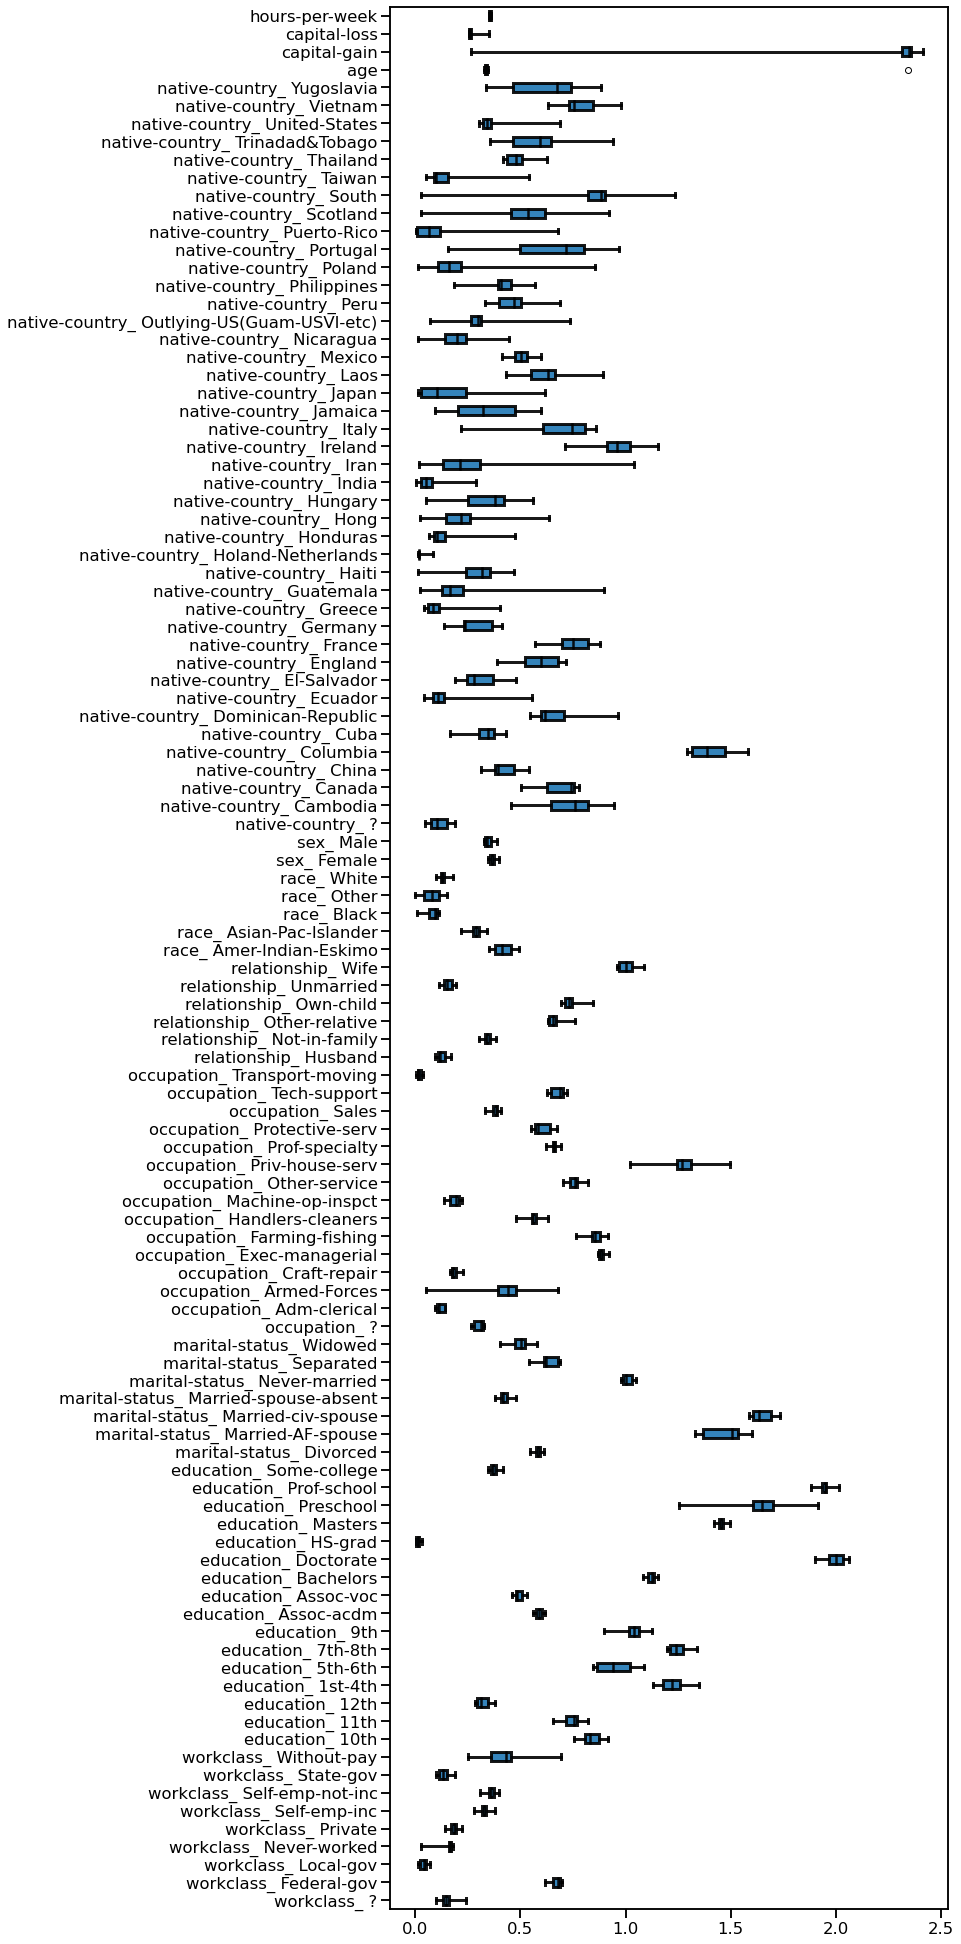

In [92]:
coefs = [estimator[-1].coef_[0] for estimator in cv_results["estimator"]]
coefs = pd.DataFrame(coefs, columns=feature_names)

# Define the style of the box style
boxplot_property = {
    "vert": False,
    "whis": 100,
    "patch_artist": True,
    "widths": 0.5,
    "boxprops": dict(linewidth=3, color="black", alpha=0.9),
    "medianprops": dict(linewidth=2.5, color="black", alpha=0.9),
    "whiskerprops": dict(linewidth=3, color="black", alpha=0.9),
    "capprops": dict(linewidth=3, color="black", alpha=0.9),
}

_, ax = plt.subplots(figsize=(10, 35))
_ = coefs.abs().plot.box(**boxplot_property, ax=ax)

In [94]:
for model in cv_results["estimator"]:
    print(model[-1].get_params()['C'])

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [100]:
model.set_params(logisticregression__C=0.1)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native-country']),
                                                 ('standard-scaler',
                                                  StandardScaler(),
                                                  ['age', 'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week'])])),
                ('logisticregression',
                 LogisticRegression(C=0.1, max_i

In [101]:
cv_results = cross_validate(model, data, target,
                            cv=10, return_estimator=True, n_jobs=2)
cv_results["test_score"].mean()

0.8515212039060556

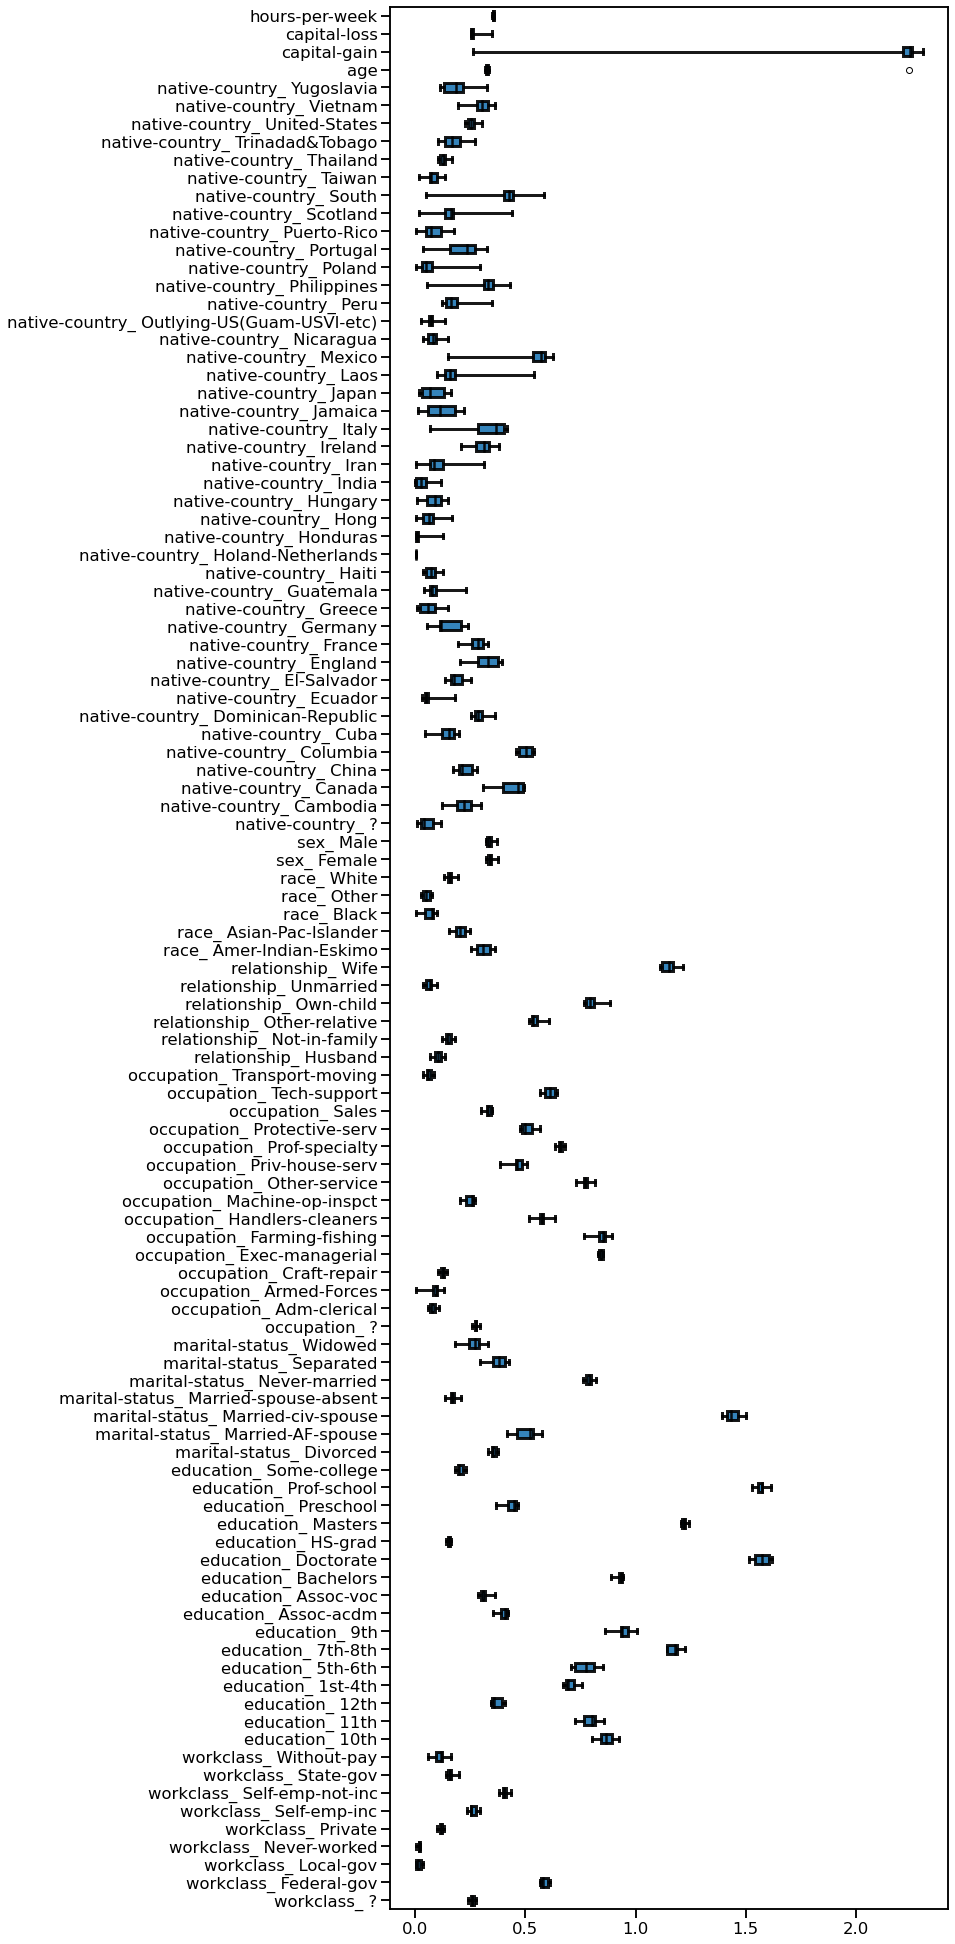

In [103]:
coefs = [estimator[-1].coef_[0] for estimator in cv_results["estimator"]]
coefs = pd.DataFrame(coefs, columns=feature_names)

# Define the style of the box style
boxplot_property = {
    "vert": False,
    "whis": 100,
    "patch_artist": True,
    "widths": 0.5,
    "boxprops": dict(linewidth=3, color="black", alpha=0.9),
    "medianprops": dict(linewidth=2.5, color="black", alpha=0.9),
    "whiskerprops": dict(linewidth=3, color="black", alpha=0.9),
    "capprops": dict(linewidth=3, color="black", alpha=0.9),
}

_, ax = plt.subplots(figsize=(10, 35))
_ = coefs.abs().plot.box(**boxplot_property, ax=ax)